# Data Analysis 2- Final Project

Using conditional logistic regressions (Logit Regressions), I will be exploring the relationships that certain explanatory variables (Monthly income/log of monthly income, pitch satisfaction score, number of followups, and whether one has a passport or not) have on the binary dependent variable, whether one purchased the travel package or not. 
The goal is to see if these variables have an effect on the probability that someone purchased the travel package

In [2]:
#Topic: Pricing and Sales (Kaggle datatable: Holiday Package Prediction)

#https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction

import warnings

import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
warnings.filterwarnings("ignore")

In [3]:
#reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [64]:
#changing NaN in age, monthlyincome, and number of followups to be 0 so it won't affect possible future calculations
df['Age'].fillna(0, inplace = True)
df['MonthlyIncome'].fillna(0, inplace = True)
df['NumberOfFollowups'].fillna(0, inplace = True)
df['DurationOfPitch'].fillna(0, inplace = True)
#Count column to help with aggregations
df['Count'] = 1
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Count,LnMonthlyIncome,PredLogitLnIncome,PredLogitPitch,PredLogitFollowup,PredLogitPassport
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,1,0.0,Manager,20993.0,1,9.951944,0.210977,0.191581,0.153330,0.300714
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,1,2.0,Manager,20130.0,1,9.909967,0.224487,0.222460,0.247476,0.164142
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,0,0.0,Executive,17090.0,1,9.746249,0.282864,0.280954,0.330901,0.553601
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,1,1.0,Executive,17909.0,1,9.793059,0.265268,0.307485,0.274596,0.486189
4,200004,0,0.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,1,0.0,Executive,18468.0,1,9.823795,0.254102,0.295168,0.259604,0.175752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,...,1,1.0,Manager,26576.0,1,10.187764,0.146200,0.119503,0.160600,0.307917
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,...,1,2.0,Executive,21212.0,1,9.962322,0.207731,0.205698,0.296423,0.508245
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,...,1,3.0,Senior Manager,31820.0,1,10.367850,0.108606,0.087867,0.077217,0.043635
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,0,2.0,Executive,20289.0,1,9.917834,0.221909,0.259334,0.288193,0.197203


## Variables for study:
- y: ProdTaken
- x: Monthly Income/LnMonthlyIncome
- z(s): PitchSatisfactionScore, NumberOfFollowups, Passport

In [8]:
#description of monthly income for those who didn't take package
df.loc[df['ProdTaken'] == 0]['MonthlyIncome'].describe()
#surprised that mean is higher here... BUT is it statistically significant???

count     3968.000000
mean     22747.214466
std       7494.701528
min          0.000000
25%      20130.750000
50%      22413.500000
75%      25760.250000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [9]:
#description of monthly income for those who did take package
df.loc[df['ProdTaken'] == 1]['MonthlyIncome'].describe()

count      920.000000
mean     21401.598913
std       6114.176598
min          0.000000
25%      17951.000000
50%      21095.500000
75%      23857.500000
max      38537.000000
Name: MonthlyIncome, dtype: float64

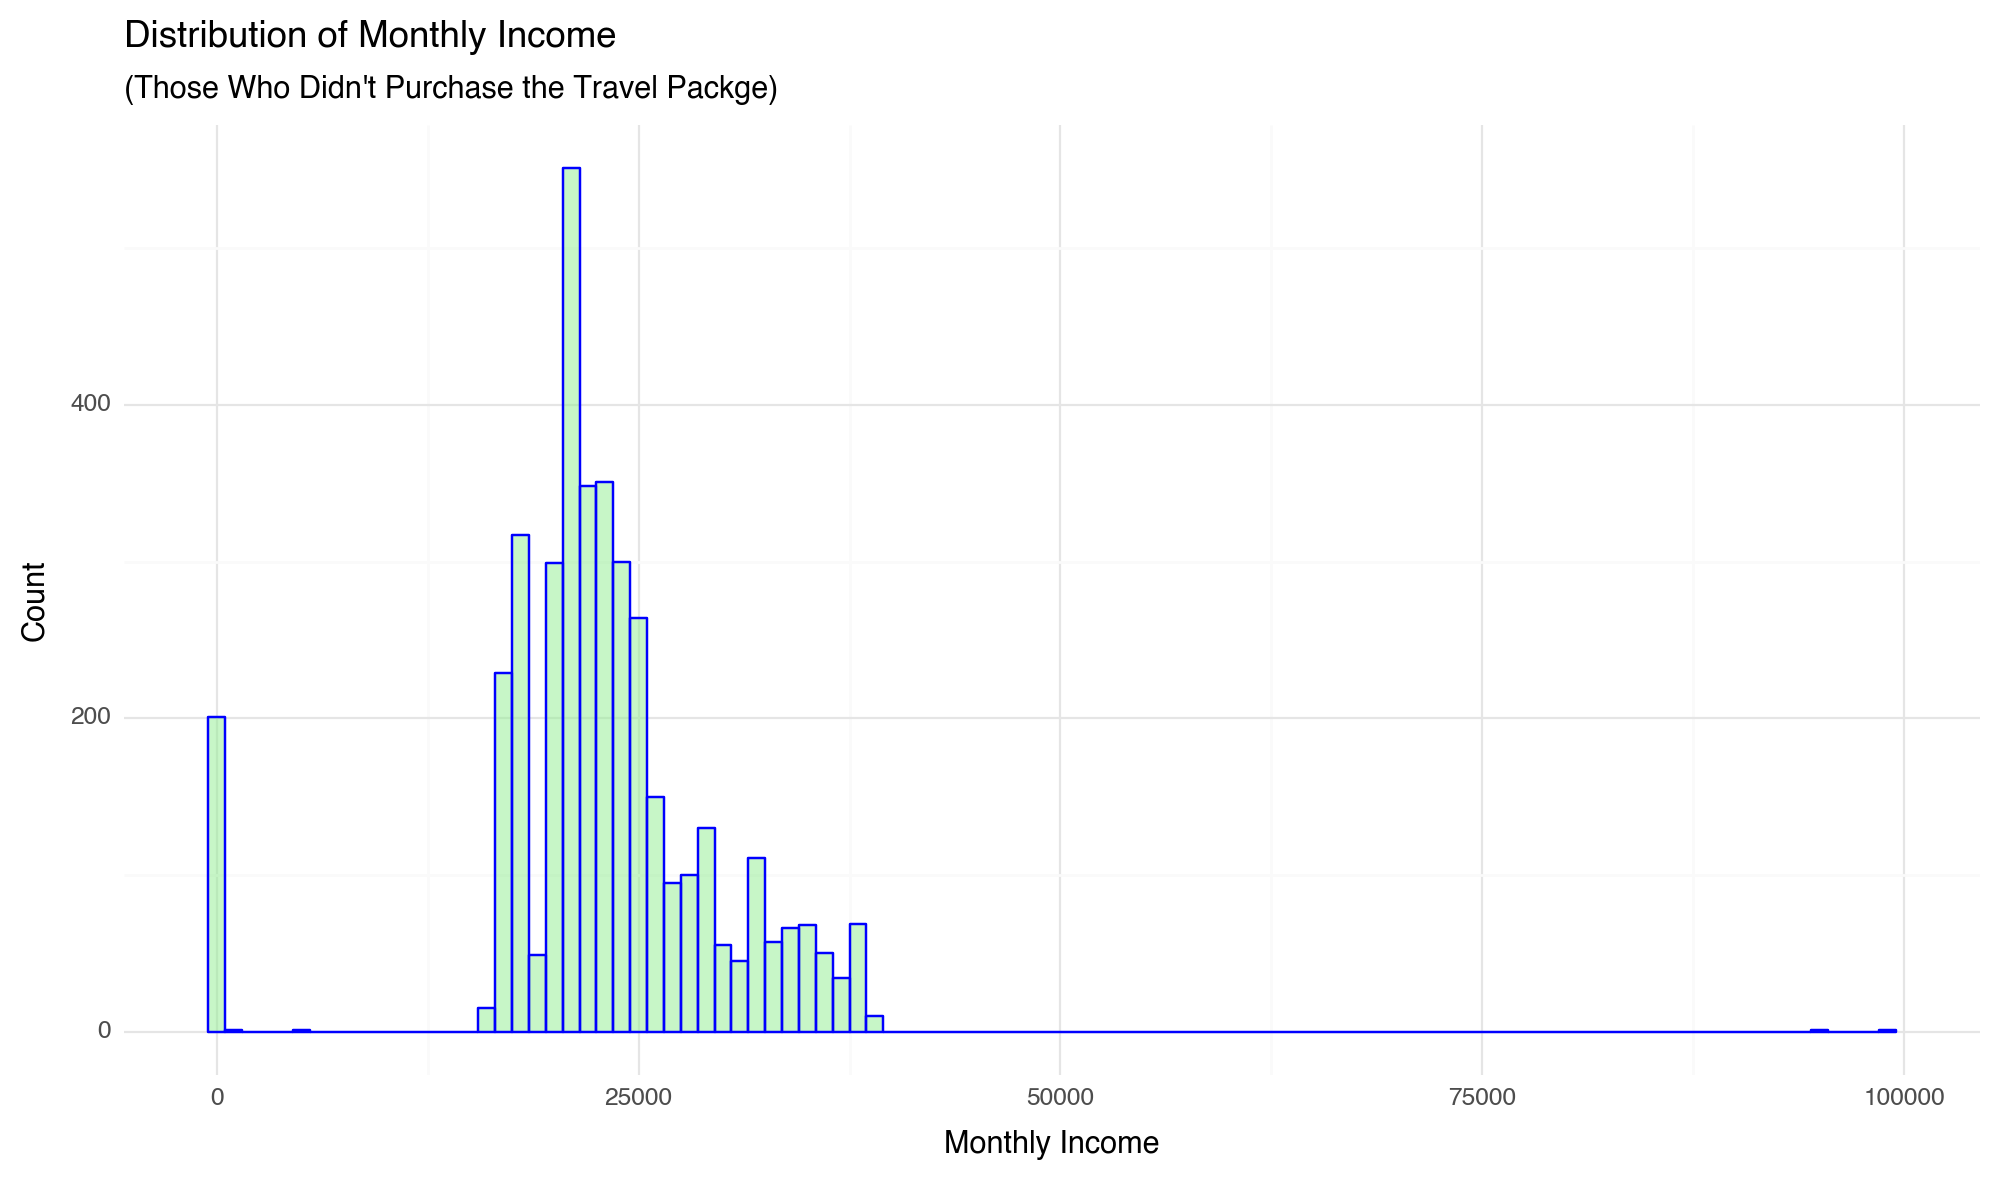

<Figure Size: (1000 x 600)>

In [10]:
#histogram to see monthly income distribution for those who didn't take package
df_no_package = df[df['ProdTaken'] == 0]
hist1 = (ggplot(df_no_package, aes(x = 'MonthlyIncome')) 
+ geom_histogram(binwidth = 1000, fill = 'lightgreen', color = 'blue', alpha = 0.5)
+ labs(x = 'Monthly Income', y = 'Count', title = "Distribution of Monthly Income", 
       subtitle = "(Those Who Didn't Purchase the Travel Packge)")
+ theme_minimal() + theme(figure_size=(10, 6)))
hist1

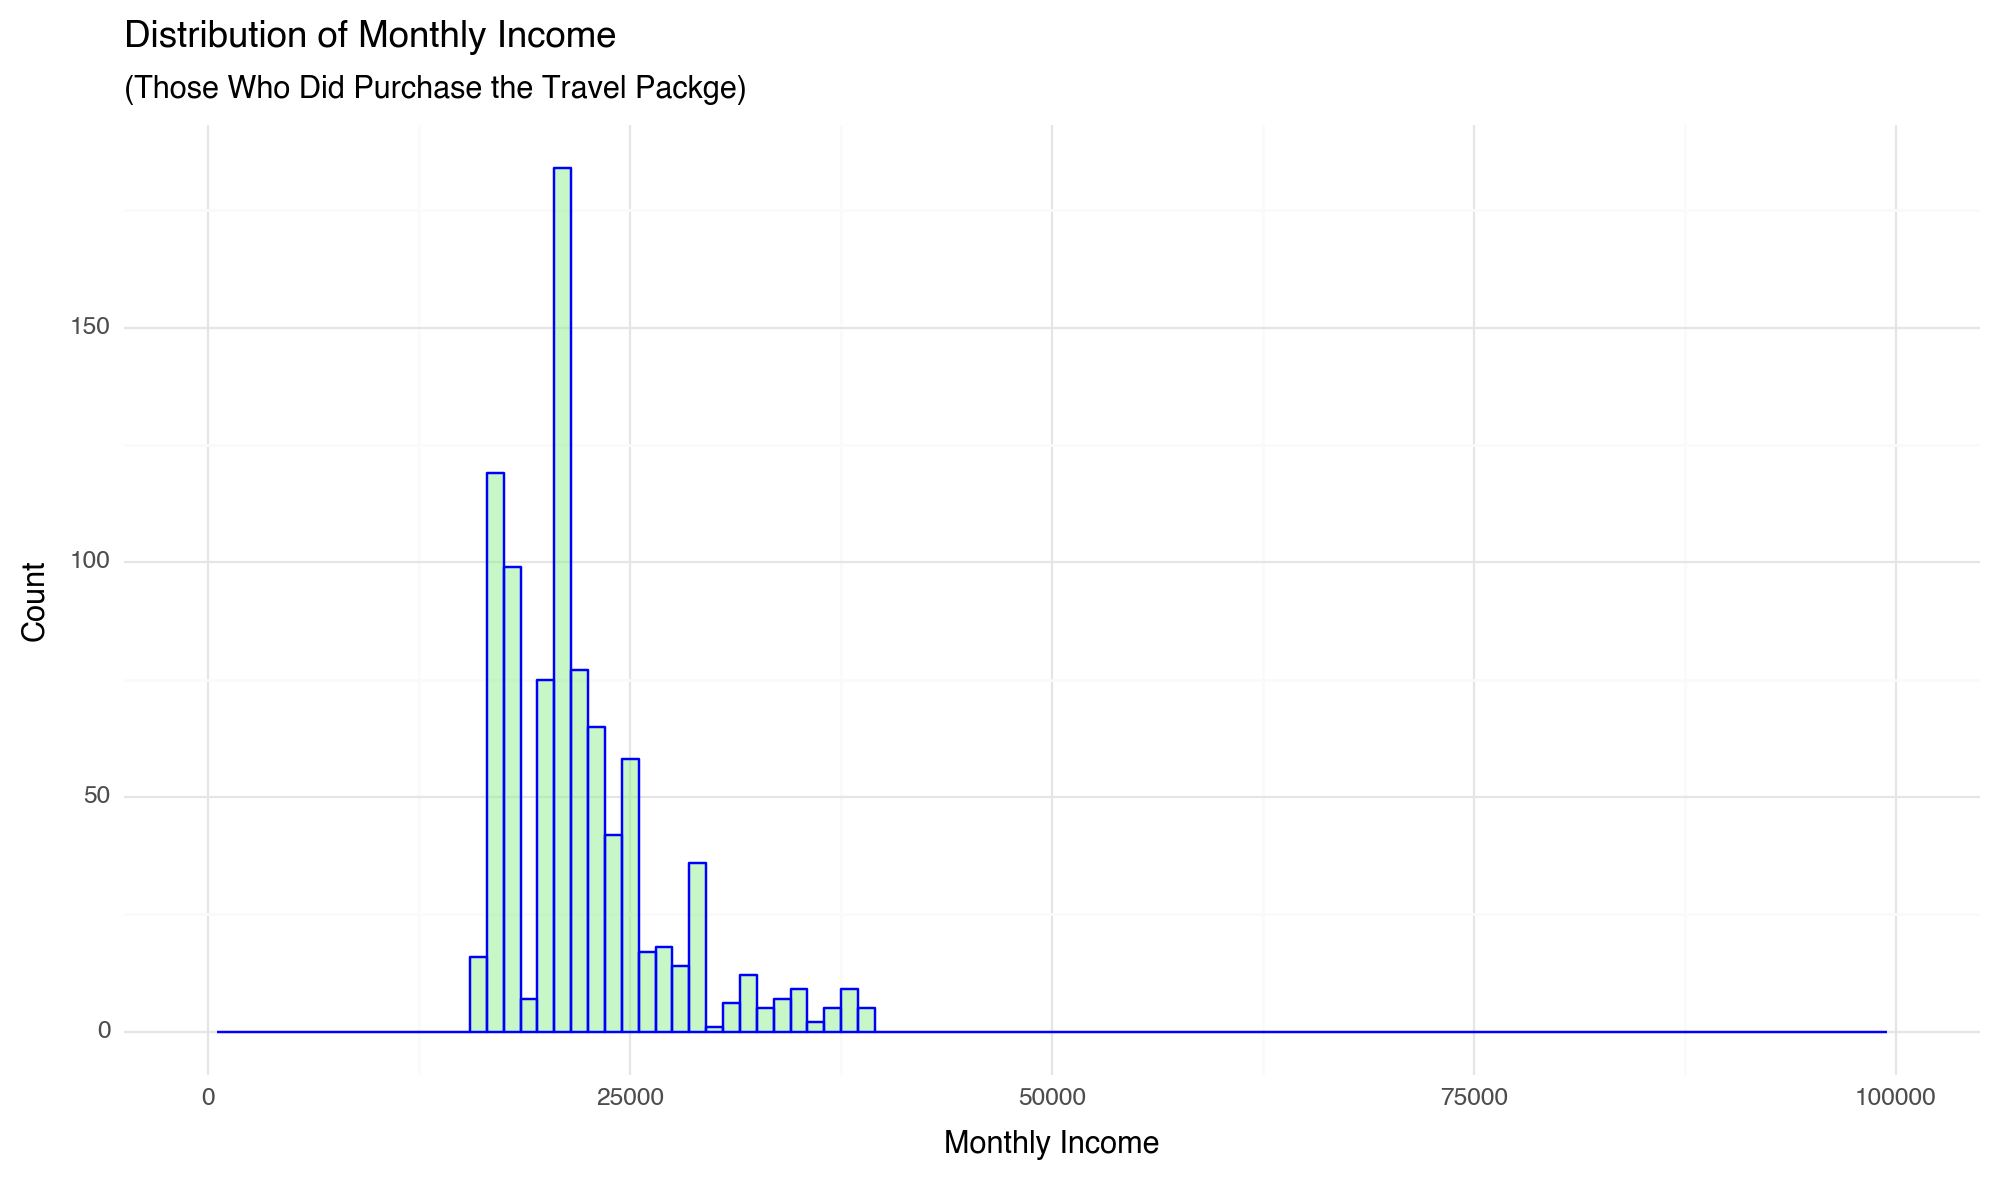

<Figure Size: (1000 x 600)>

In [11]:
#histogram to see monthly income distribution for those who did take package
df_package = df[df['ProdTaken'] == 1]
hist2 = (ggplot(df_package, aes(x = 'MonthlyIncome')) 
+ geom_histogram(binwidth = 1000, fill = 'lightgreen', color = 'blue', alpha = 0.5)
+ labs(x = 'Monthly Income', y = 'Count', title = "Distribution of Monthly Income", 
       subtitle = "(Those Who Did Purchase the Travel Packge)")
+ theme_minimal() + theme(figure_size=(10, 6))
+ scale_x_continuous(limits=(0, 100000)))
hist2

The histograms are pretty similar although 1st histogram seems to be more disributed towards center and have 
more variation in x (both lower and larger values shown)- however, this is most likely due to the fact that a larger proportion of customers did not buy the travel package. 

I will not be doing a normal regression as the dependent variable (Product Taken) is binary. Between the choices of LPM, Logit, and Probit, I will choose to do Logit regressions because they don't assume linearity, and the range for my dependent variable won't fall outside of [0,1]. This will mean I will need to have a marginal effects table as well for each logit regression as logit regressions don't produce as readily interpretable coefficients as linear probability models (LPMs). 

In [13]:
#Logit regression of ProdTaken on MonthlyIncome
x_vars = sm.add_constant(df[['MonthlyIncome']])
model = sm.Logit(df['ProdTaken'], x_vars)
result1 = model.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.481050
         Iterations 5


In [14]:
#marginal effects for above logit regression
marginal_effects = result1.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MonthlyIncome -3.779e-06    6.6e-07     -5.730      0.000   -5.07e-06   -2.49e-06


Logit Marginal Effects Interpretation: For a one dollar increase in monthly income, a person is on average 3.779e-06 times less likely to buy the travel package. The coefficient is statistically significant. This interpretation is not the nicest, so we will also look at the log of monthly income to see if that produces more interpretable coefficients.
- The coefficient is statistically significant and can therefore be applied to the population.

In [20]:
#adding a log of monthly income comlumn represented as 'LnMonthlyIncome' to try to produce more interpretable coefficients
df['LnMonthlyIncome'] = np.log(df['MonthlyIncome'])

In [32]:
#seeing how many nan values for LnMonthlyIncome and replacing with 0
df['LnMonthlyIncome'].fillna(0, inplace = True)
df['LnMonthlyIncome'].isna().sum()
#seeing how many infinite values in LnMonthlyIncome and replacing them
df['LnMonthlyIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['LnMonthlyIncome']

0        9.951944
1        9.909967
2        9.746249
3        9.793059
4        9.823795
          ...    
4883    10.187764
4884     9.962322
4885    10.367850
4886     9.917834
4887    10.087516
Name: LnMonthlyIncome, Length: 4423, dtype: float64

In [33]:
#trying log monthly income to see if numbers are easier to interpret
#Logit regression of ProdTaken on LnMonthlyIncome
x_varsxxx = sm.add_constant(df['LnMonthlyIncome'])
modelxxx = sm.Logit(df['ProdTaken'], x_varsxxx)
resultxxx = modelxxx.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.484659
         Iterations 6


In [34]:
#marginal effects for above logit regression
marginal_effectsxxx = resultxxx.get_margeff()
print(marginal_effectsxxx.summary())

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LnMonthlyIncome    -0.2915      0.043     -6.852      0.000      -0.375      -0.208


Logit Marginal Effects Interpretation: For a 1 unit increase in log monthly income, the probability of someone buying the travel package decreases by about 29%. This coefficient is more easily interpretable than that of the level monthly income variable. This is a big find as log of monthly income seems to have a large effect on whether someone purchases the product or not- interetsingly enough, in the oppsite direction of what one would expect. This could mean other variables have something to do with this effect. Will use LnMonthlyIncome in the rest of the regressions
- The coefficient is statistically significant and can therefore be applied to the population.

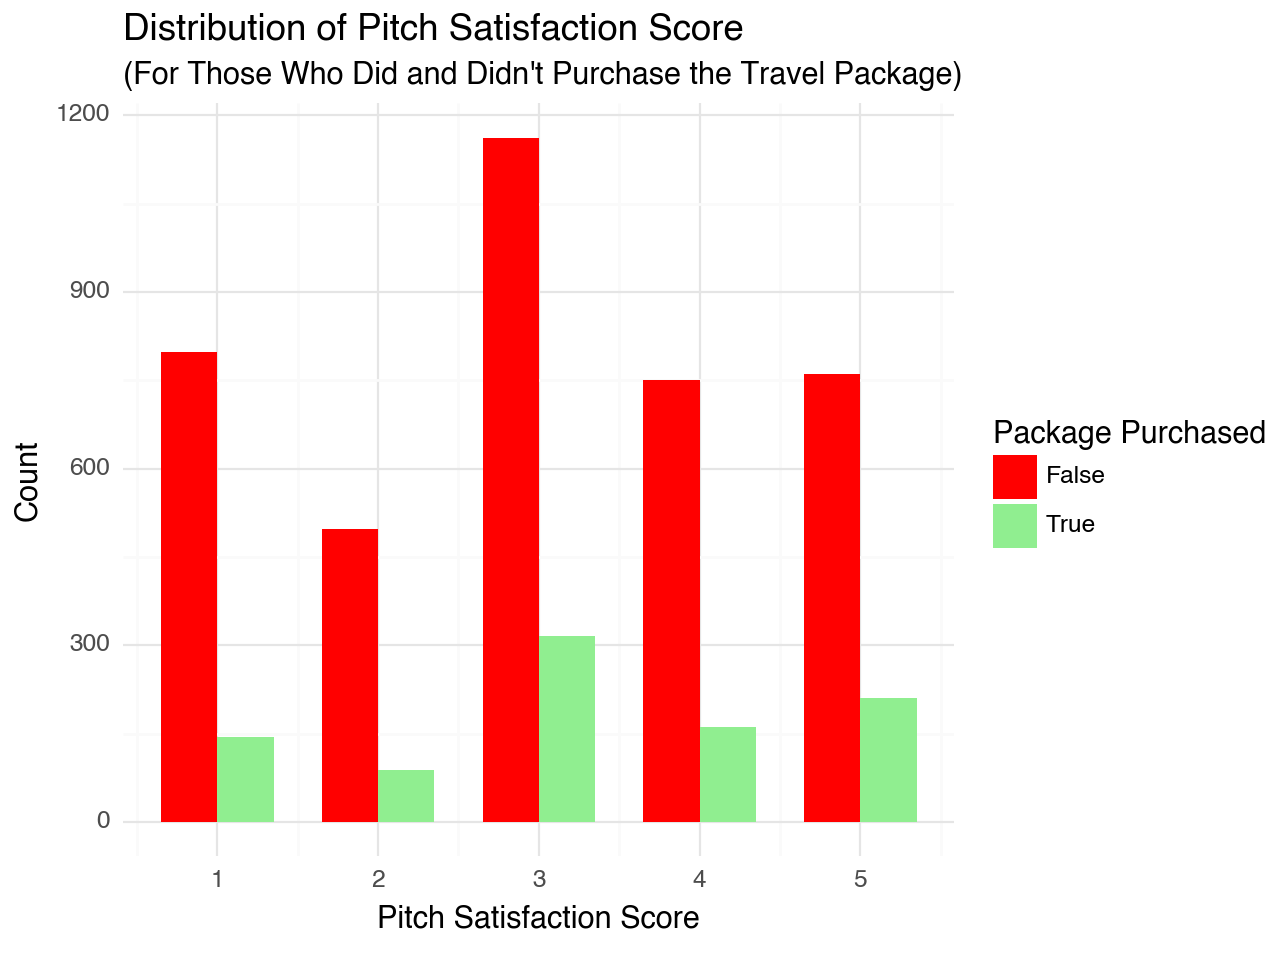

<Figure Size: (640 x 480)>

In [18]:
#pitch satisfaction score
#grouped bar chart, 1 bar = not taken, 1 bar = taken
group_bar1 = (ggplot(df, aes(x='PitchSatisfactionScore', fill= (df['ProdTaken'] ==1)))
+ geom_bar(position='dodge', width=0.7) 
+ scale_fill_manual(values=['red', 'lightgreen']) 
+ labs(x='Pitch Satisfaction Score', y='Count', fill='Package Purchased', title = 'Distribution of Pitch Satisfaction Score',
subtitle = "(For Those Who Did and Didn't Purchase the Travel Package)") 
+ theme_minimal())
group_bar1

It seems the for those who did purchase the travel package, the most purchased it only with a pitch satisfaction score of 3 which is very interesting. Possible reasons for this are that maybe those who purchased the package were planning on going on a vacation and getting the package regardless of how well it was sold to them or not.

Overall it seems that the average pitch satisfaction score was 3, both for those who did and didn't purchase the package.

In [53]:
#want to see how many customer didn't and did purchase package
df['ProdTaken'].value_counts()

ProdTaken
0    3560
1     863
Name: count, dtype: int64

It should be noted that many more people did not take the product. I would have expected more who did not take product to be higher in lower pitch satisfaction scores and those who did take product to be much higher in higher satisfaction scores. There can be many reasons for this, one possibly being that the effect of pitch satisfaction score on whether one purchased the package or not was minimal.

In [35]:
#Logit regression for Product Taken on LnMonthlyIncome and PitchSatisfactioonScore
x_vars = sm.add_constant(df[['LnMonthlyIncome', 'PitchSatisfactionScore']])
model2 = sm.Logit(df['ProdTaken'], x_vars)
result2 = model2.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.482997
         Iterations 6


In [36]:
#marginal effects of above logit regression
marginal_effects2 = result2.get_margeff()
print(marginal_effects2.summary())

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
LnMonthlyIncome           -0.2926      0.043     -6.871      0.000      -0.376      -0.209
PitchSatisfactionScore     0.0167      0.004      3.883      0.000       0.008       0.025


Logit Marginal Effects Interpretation: 
- Holding pitch satisfaction score constant, a one unit increase in log monthly income means that on average, the probability of someone purchasing the travel package decreases by about 29%.
- Holding log of monthly income constant, a one unit increase in pitch satisfaction score on average, means that the probability of someone purchasing the travel package increases by 1.67%. So indeed it seems true that the pitch satisfaction score doesn't have much to do with if one purchases a package or not, at least in comparison to the log of monthly income.
- All coefficients are statistically significant and can therefore be applied to the population.

In [54]:
#for possible future needed aggregations, creating 'SumCount column'
df_package['SumCount'] = df_package['Count'].sum()

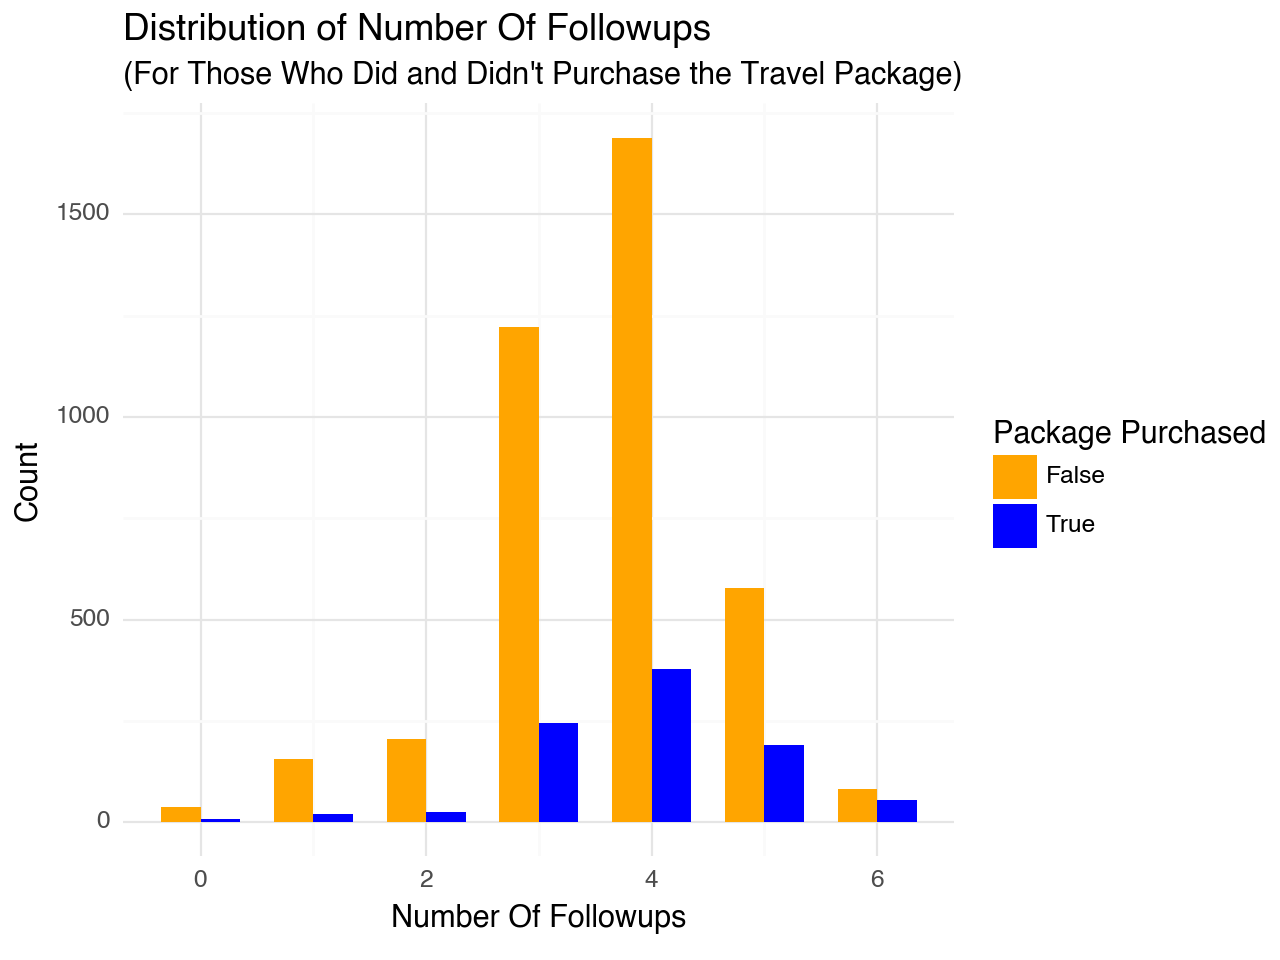

<Figure Size: (640 x 480)>

In [40]:
#numberoffollowups visualization
group_bar2 = (ggplot(df, aes(x='NumberOfFollowups', fill= (df['ProdTaken'] ==1)))
+ geom_bar(position='dodge', width=0.7) 
+ scale_fill_manual(values=['orange', 'blue']) 
+ labs(x='Number Of Followups', y='Count', fill='Package Purchased', title = 'Distribution of Number Of Followups',
subtitle = "(For Those Who Did and Didn't Purchase the Travel Package)") 
+ theme_minimal())
group_bar2

Seems that for both those who did and didn't purchase the packages, the aveerage number of followups was between 3 and 4. It is interesting because because at the 3rd followup, it seems that MANY more people decided not to buy the package in comparison to the number who didn't buy at 2 followups.

In [37]:
#Logit regression of ProdTaken on LnMonthlyIncome, PitchSatisfactionScore, and NumberOfFollowups
x_vars = sm.add_constant(df[['LnMonthlyIncome', 'PitchSatisfactionScore', 'NumberOfFollowups']])
model3 = sm.Logit(df['ProdTaken'], x_vars)
result3 = model3.fit(cov_type = 'HC1')

Optimization terminated successfully.
         Current function value: 0.472384
         Iterations 6


In [55]:
#logit marginal effects for the above regression
marginal_effects3 = result3.get_margeff()
print(marginal_effects3.summary())

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
LnMonthlyIncome           -0.3751      0.048     -7.782      0.000      -0.470      -0.281
PitchSatisfactionScore     0.0171      0.004      4.068      0.000       0.009       0.025
NumberOfFollowups          0.0569      0.007      8.623      0.000       0.044       0.070


Logit Marginal Effects Interpretation: 
- Holding pitch satisfaction score and number of followups constant, a one unit increase in log monthly income means that on average, the probability of someone purchasing the travel package decreases by about 37%.
- Holding log of monthly income and number of followups constant, a one unit increase in pitch satisfaction score on average, means that the probability of someone purchasing the travel package increases by 1.71%.
- Holding ln monthly income and pitch satisfaction score constant, an one unit increase in number of followups, on average, means the probability of someome purchasing the travel package increases by 5.69%
- All coefficients are statistically significant and can therefore be applied to the population.

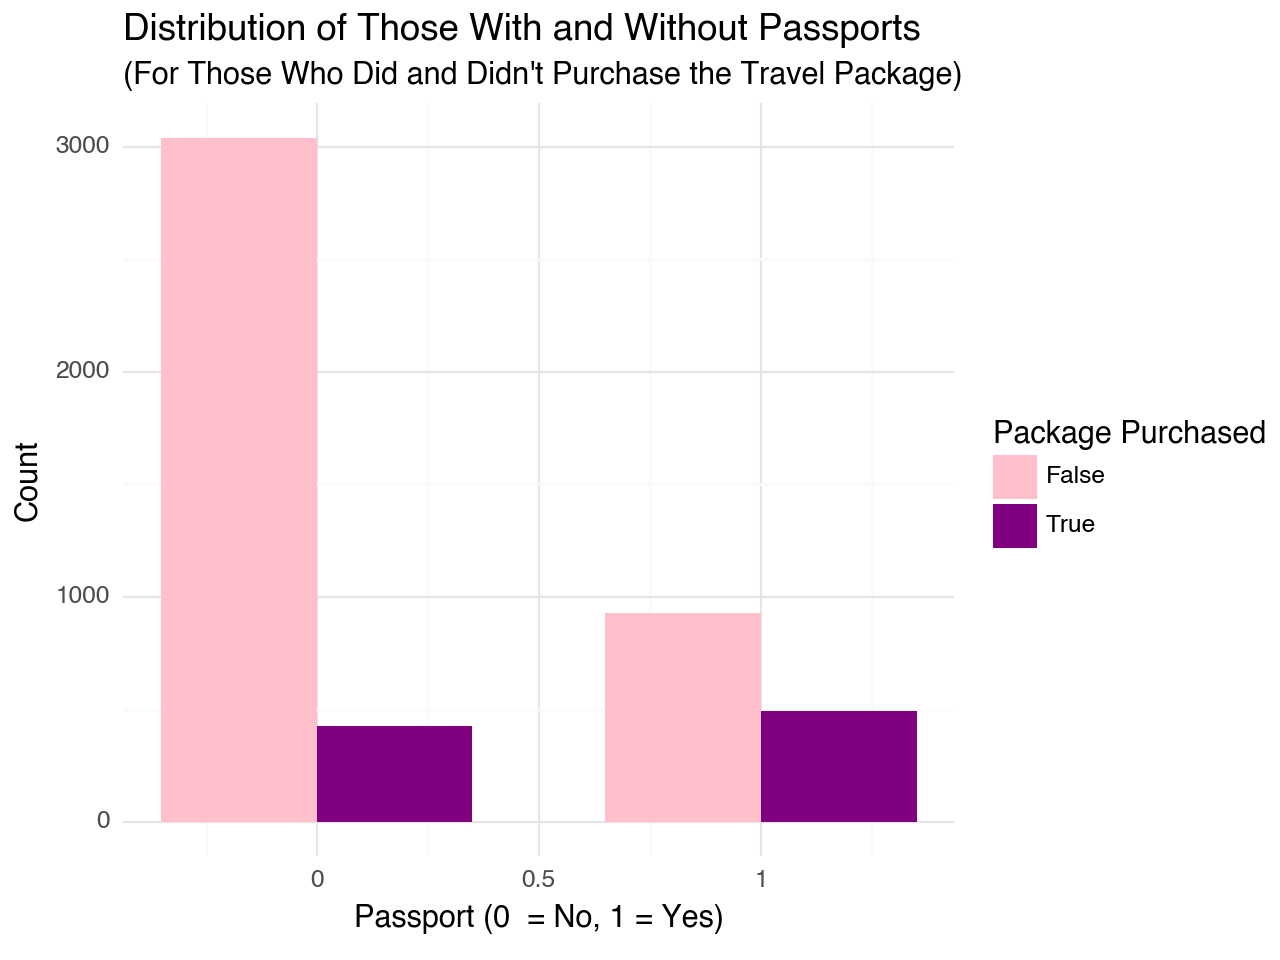

<Figure Size: (640 x 480)>

In [53]:
#passport visualization
group_bar3 = (ggplot(df, aes(x="Passport", fill= (df['ProdTaken'] ==1)))
+ geom_bar(position='dodge', width=0.7) 
+ scale_fill_manual(values=['pink', 'purple']) 
+ labs(x='Passport (0  = No, 1 = Yes)', y='Count', fill='Package Purchased', title = 'Distribution of Those With and Without Passports',
subtitle = "(For Those Who Did and Didn't Purchase the Travel Package)") 
+ theme_minimal())
group_bar3
#interesting because shows that there were more people without passports who didn't purchase
#also, there were more withh passports who did purchase than those without who did ---- do these 2 sentences really say that much?

More people who purchased the travel package had their passports (by a minimal amount). More people who did not purchase the package did not have their passports. This is interesting as it might have something to say about the effect having a passport or not had on whether people bought a travel package (if statistically significant).

In [59]:
#Logit regression of ProdTaken on LnMonthlyIncome, PitchSatisfactionScore, NumberOfFollowups, and Passport
x_vars = sm.add_constant(df[['LnMonthlyIncome', 'PitchSatisfactionScore', 'NumberOfFollowups', 'Passport']])
model4 = sm.Logit(df['ProdTaken'], x_vars)
result4 = model4.fit(cov_type = 'HC1')
#has the highest pseudo R-squared with value of 0.1120

Optimization terminated successfully.
         Current function value: 0.438287
         Iterations 6


In [60]:
#marginal effects of the above logit regression
marginal_effects4 = result4.get_margeff()
print(marginal_effects4.summary())
#maybe Passport is one of the largest factors behind why people buy these packages... say someone didn't get theirs in time
#or can't...if you have passport, probability of purchasing package increases by 18.93 percentage points

        Logit Marginal Effects       
Dep. Variable:              ProdTaken
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
LnMonthlyIncome           -0.3677      0.046     -7.936      0.000      -0.458      -0.277
PitchSatisfactionScore     0.0170      0.004      4.264      0.000       0.009       0.025
NumberOfFollowups          0.0542      0.006      8.660      0.000       0.042       0.066
Passport                   0.1952      0.010     19.539      0.000       0.176       0.215


Logit Marginal Effects Interpretation: 
- Holding pitch satisfaction score, number of followups, and having/not having a passport constant, a one unit increase in log monthly income means that on average, the probability of someone purchasing the travel package decreases by about 36%.
- Holding log of monthly income, number of followups, and having/no having a passport constant, a one unit increase in pitch satisfaction score on average, means that the probability of someone purchasing the travel package increases by 1.70%.
- Holding ln monthly income, pitch satisfaction score, and having/not having a passport constant, a one unit increase in number of followups, on average, means the probability of someome purchasing the travel package increases by 5.42%
- Holding ln monthly income, pitch satisfaction score, and number of followups constant, having a passport, on average, means the probability of someone purchasing a travel package increases by 19.52% This is a big find as it shows those without passports are almost 20% less likely to purchase the travel package. If the packages were for international travel destinations, this would make sense. Maybe the customers would not be able to get their passports in time, or didn't want to go through the hassle of doing so. If the packages for the most part were domestic destinations, this would perhaps have less meaning.

- All coefficients are statistically significant and can therefore be applied to the population.

In [62]:
#creating predicted probabilities for each explanatory variable
df["PredLogitLnIncome"] = resultxxx.predict()
df["PredLogitPitch"] = result2.predict()
df["PredLogitFollowup"] = result3.predict()
df["PredLogitPassport"] = result4.predict()

In [63]:
#Fit of predicted probabilities:

pd.DataFrame(
    {
        "R-squared": [
            r2_score(df["ProdTaken"], df["PredLogitLnIncome"]),
            r2_score(df["ProdTaken"], df["PredLogitPitch"]),
            r2_score(df["ProdTaken"], df["PredLogitFollowup"]),
            r2_score(df["ProdTaken"], df["PredLogitPassport"])
            
        ],
        "Brier-score": [
            mean_squared_error(df["ProdTaken"], df["PredLogitLnIncome"]),
            mean_squared_error(df["ProdTaken"], df["PredLogitPitch"]),
            mean_squared_error(df["ProdTaken"], df["PredLogitFollowup"]),
            mean_squared_error(df["ProdTaken"], df["PredLogitPassport"])
            
        ],
        "Log-loss": [
            -1 * log_loss(df["ProdTaken"], df["PredLogitLnIncome"]),
            -1 * log_loss(df["ProdTaken"], df["PredLogitPitch"]),
            -1 * log_loss(df["ProdTaken"], df["PredLogitFollowup"]),
            -1 * log_loss(df["ProdTaken"], df["PredLogitPassport"])
        ],
    
    
    
    }, index=["LnIncome", "Pitch", "Followup", "Passport"],).T.round(3)

,LnIncome,Pitch,Followup,Passport
R-squared,0.019,0.022,0.049,0.134
Brier-score,0.154,0.154,0.149,0.136
Log-loss,-0.485,-0.483,-0.472,-0.438


The variable of passport seems to provide the best fit to the model (highest R-squared, highest Log-loss, lowest Brier-score) which makes sense to due the effect we saw in the marginal effects table involving passport. 

Interestingly LnIncome (meaning LnMonthlyIncome) has one of the worst fits of the variables. This confirms what was earlier believed: LnMonthlyIncome on its own doesn't seem to have a strong relationship with whether one purchased the travel package or not.

# Summary: 